# Zápočtový program EVO 1

Jako zápočtový program jsem implementoval některé evolucí motivované algoritmy pro spojitou optimalizaci více účelových funkcí s omezujícími podmínkami.
Pro testování implementovaných algoritmů jsem použil knihovnu [pymoo](https://pymoo.org/).

**Implementované algoritmy**:
1. Diferenciální evoluce
2. Evoluční strategie s adaptivními operátory
3. Non-dominated Sorting Genetic Algorithm 2

**Problémy a jejich řešení**:
1. Omezující podmínky: všechny algoritmy pracují i s nepřípustnými řešeními, aby byla zajištěna diverzita populace, obecně ale preferují řešení přípustná
2. Více účelových funkcní: hledáme tzv. pareto optimální řešení, tj. taková, které pareto dominují všechna ostatní, tedy jsou ve všech ÚF alespoň tak dobrá a v nějaké lepší

**Experimenty**
- Pro experimenty využívám problémy z knihovny [pymoo](https://pymoo.org/)
- Výslekdy jednotlivých algoritmů porovnávám s množinou pareto optimálních řešení, která je u některéch problémů dostupná
- Zároveň používám tyto metriky pro porovnání algoritmů
    - **GD**: průměrná vzdálenost jedinců od pareto optimálních řešení, čím nižší, tím lepší
    - **IGD**: průměrná vzdálenost pareto optimálních řešení od jedinců, čím nižší, tím lepší
    - **Spread**: standartní odchylka od průměrné vzdálenosti, rozptýlenost populace, čím nižší, tím lepší
- Na grafech je množina PO řešení znázorněna šedě, přípustná řešení algoritmů barevně

In [1]:
from pymoo.problems import get_problem
from differential_evolution import  differential_evolution_feasible
from evolutionary_strategies import evolutionary_strategies_feasible
from nsga2 import nsga2_feasible
from experiments import plot_pareto_front, print_quality_metrics

## Experiment [BNH](https://pymoo.org/problems/multi/bnh.html)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 2                 | 2         | 2                 |

Na tomto jednoduchém problému fungují všechny algoritmy podobně dobře a najdou dostatek PO nebo blízkých řešení.
Nejlépe se daří diferenciální evoluci, NSGA2 dobře pokrývá celý rozsah pareto optimálních řešení.

---- Quality Metrics for bnh ----
DE       | #:  100 | GD: 0.4446 | IGD: 2.8213 | Spread: 1.4402
ES       | #:  100 | GD: 0.5018 | IGD: 4.4642 | Spread: 2.3494
NSGA-II  | #:   50 | GD: 0.3703 | IGD: 1.1071 | Spread: 2.1754


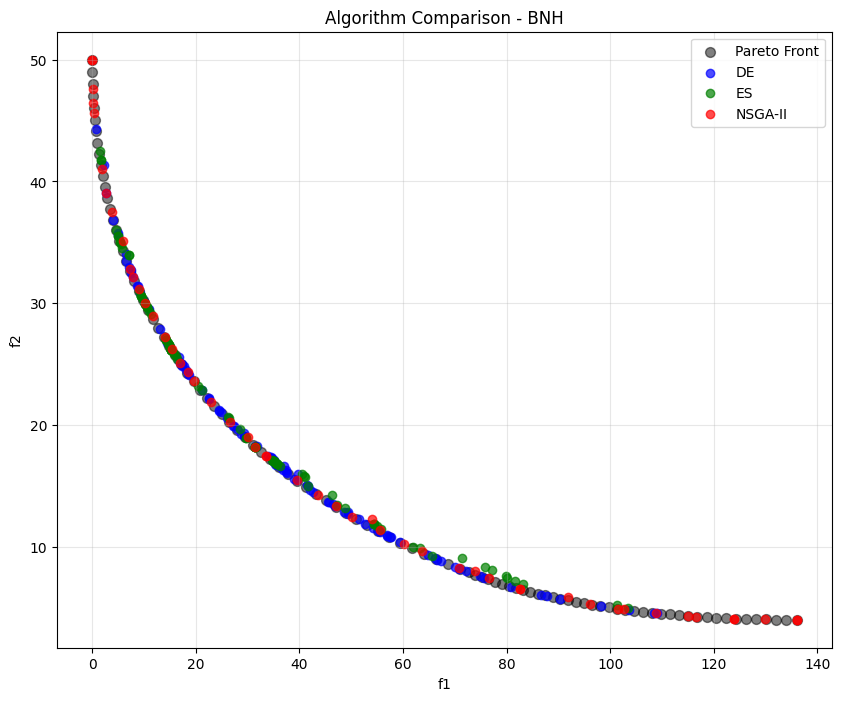

In [2]:
problem_name = 'bnh'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=100, generations=500)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=100, generations=200)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=50, generations=100)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [OSY](https://pymoo.org/problems/multi/osy.html)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 6                 | 2         | 6                 |

V tomto exprimentu se opět ukazuje, že NSGA2 nejlépe pokrývá téměř celou množinu PO řešení.
Naopak řešení DE i ES jsou koncentrovaná jen v určitých místech, pravděpodobně kvůli nedostatečné diverzitě populace.

---- Quality Metrics for osy ----
DE       | #:  100 | GD: 2.7072 | IGD: 20.9740 | Spread: 2.5841
ES       | #:  100 | GD: 2.3119 | IGD: 16.9091 | Spread: 3.0074
NSGA-II  | #:  100 | GD: 2.5199 | IGD: 5.0378 | Spread: 3.6510


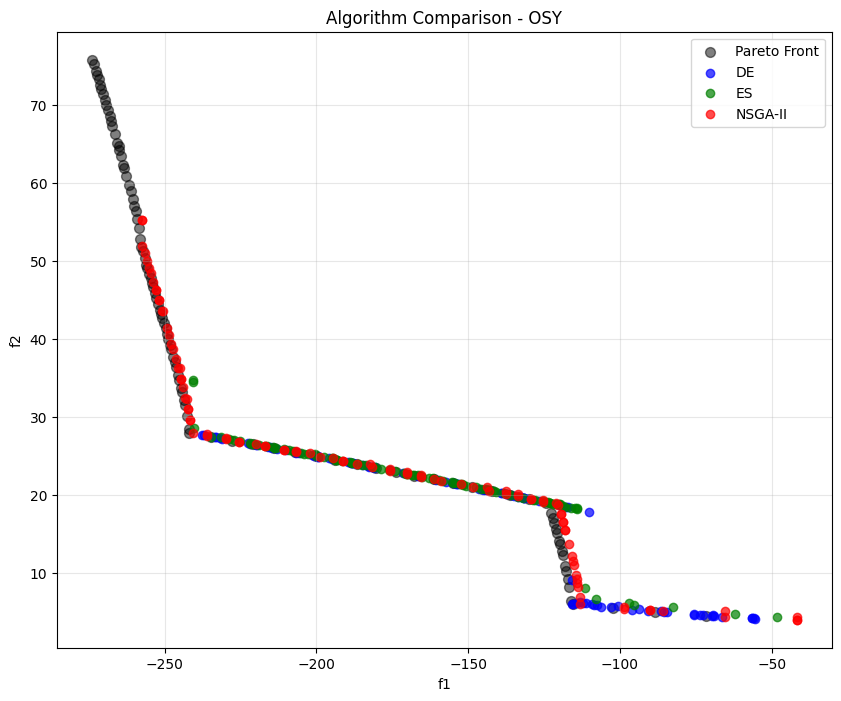

In [3]:
problem_name = 'osy'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=100, generations=1000)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=100, generations=500)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=100, generations=500)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [ZDT1](https://pymoo.org/problems/multi/zdt.html#ZDT1)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 30                | 2         | 0                 |

V tomto experimentu nejsou dány žádné omezující podmínky, pouze intervaly hodnot proměnných.
Množina PO řešení je navíc konvexní.

Na tomto exprimentu s relativně mnoha proměnými vidíme, že NSGA2 přímo určený pro více-kriteriální optimalizaci najde a pokryje PO řešení velmi rychle a efektivně.
I diferenciální evoluce byla schopna se po dostatečném počtu generací a jedinců a PO řešením dobře přiblížit.
Naopak evoluční strategie selhaly, možná kvůli nedostatečné přesnosti.

Generation 50: 200/200 feasible solutions, avg σ: 0.1701
Generation 100: 200/200 feasible solutions, avg σ: 0.1437
Generation 150: 200/200 feasible solutions, avg σ: 0.1326
Generation 200: 200/200 feasible solutions, avg σ: 0.1166
Generation 250: 200/200 feasible solutions, avg σ: 0.1235
Generation 300: 200/200 feasible solutions, avg σ: 0.1354
Generation 350: 200/200 feasible solutions, avg σ: 0.1390
Generation 400: 200/200 feasible solutions, avg σ: 0.1330
Generation 450: 200/200 feasible solutions, avg σ: 0.1295
Generation 500: 200/200 feasible solutions, avg σ: 0.1324
Generation 550: 200/200 feasible solutions, avg σ: 0.1306
Generation 600: 200/200 feasible solutions, avg σ: 0.1282
Generation 650: 200/200 feasible solutions, avg σ: 0.1286
Generation 700: 200/200 feasible solutions, avg σ: 0.1326
Generation 750: 200/200 feasible solutions, avg σ: 0.1338
Generation 800: 200/200 feasible solutions, avg σ: 0.1301
Generation 850: 200/200 feasible solutions, avg σ: 0.1281
Generation 900:

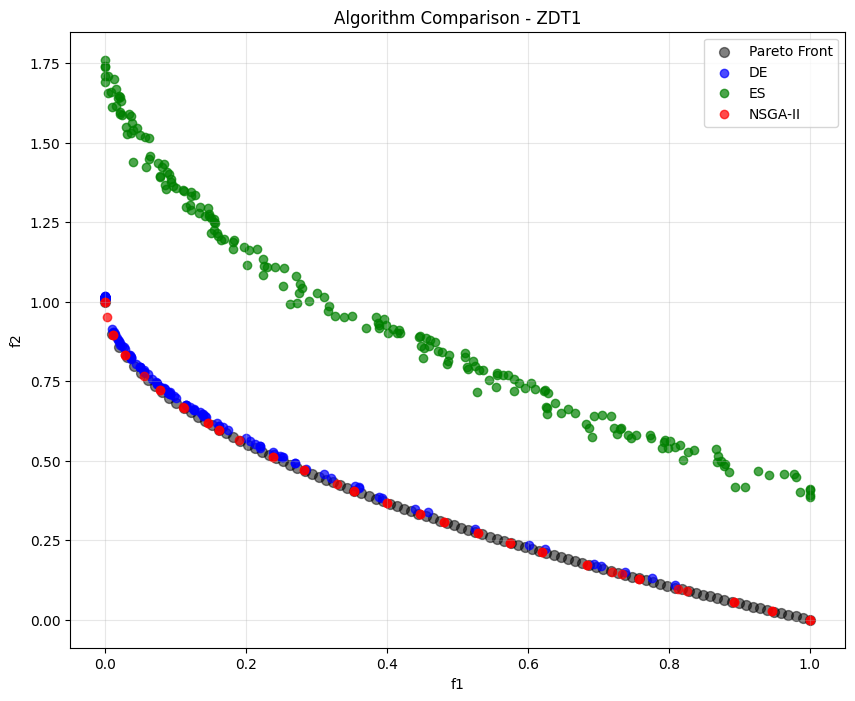

In [ ]:
problem_name = 'zdt1'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=200, generations=1000)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=200, generations=1000, sigma_range_fac=0.02, center_bias=0.05)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=50, generations=200)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [ZDT2](https://pymoo.org/problems/multi/zdt.html#ZDT2)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 30                | 2         | 0                 |

V tomto experimentu nejsou dány žádné omezující podmínky, pouze intervaly hodnot proměnných.
Množina PO řešení je tentokrát nekonvexní.

V tomto experimentu vidíme, že DE zkonvergovala do jednoho, lokálního optima.
Evoluční strategie měly opět problém dosáhnout dostatečné přesnosti, ale našli dostatek přípustných řešení.
Nejlepší výsledky opět poskytl NSGA2.

---- Quality Metrics for zdt2 ----
DE       | #:  200 | GD: 0.0000 | IGD: 0.6105 | Spread: 0.0000
ES       | #:  100 | GD: 0.6093 | IGD: 0.5904 | Spread: 0.0398
NSGA-II  | #:   50 | GD: 0.0031 | IGD: 0.0169 | Spread: 0.0377


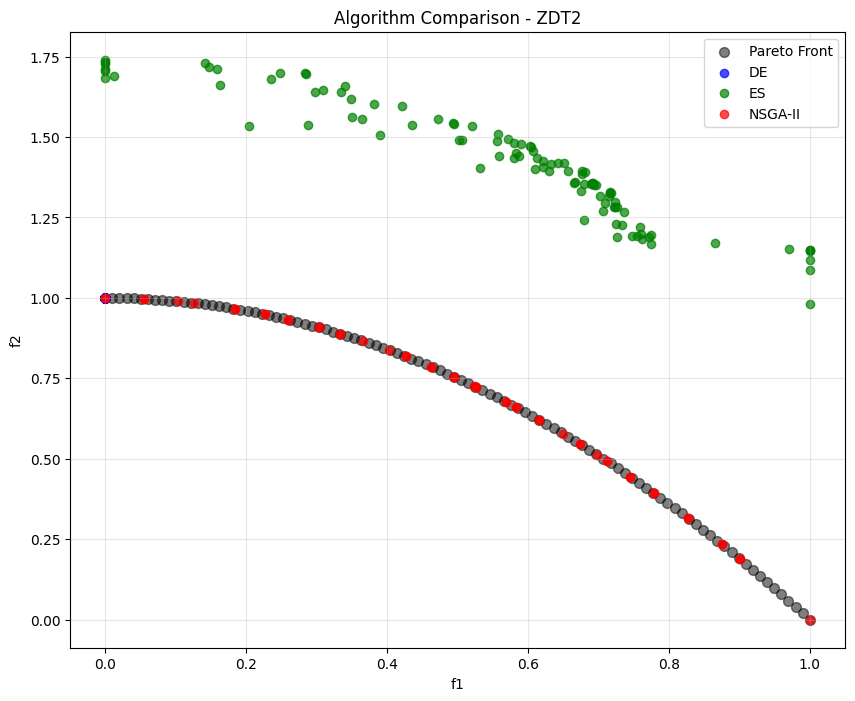

In [5]:
problem_name = 'zdt2'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=200, generations=1000, F=0.5)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=100, generations=1000, sigma_range_fac=0.02, center_bias=0.05)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=50, generations=200)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [ZDT3](https://pymoo.org/problems/multi/zdt.html#ZDT3)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 30                | 2         | 0                 |

V tomto experimentu nejsou dány žádné omezující podmínky, pouze intervaly hodnot proměnných.
Množina PO řešení je tentokrát nespojitá.
Nejlépe si opět vedly algoritmy NSGA2 a DE.
ES opět našili dostatek přípustných, ne však optimálních řešení.


---- Quality Metrics for zdt3 ----
DE       | #:  200 | GD: 0.0023 | IGD: 0.0282 | Spread: 0.0354
ES       | #:  100 | GD: 0.3290 | IGD: 0.3083 | Spread: 0.0453
NSGA-II  | #:   50 | GD: 0.0048 | IGD: 0.0258 | Spread: 0.0587


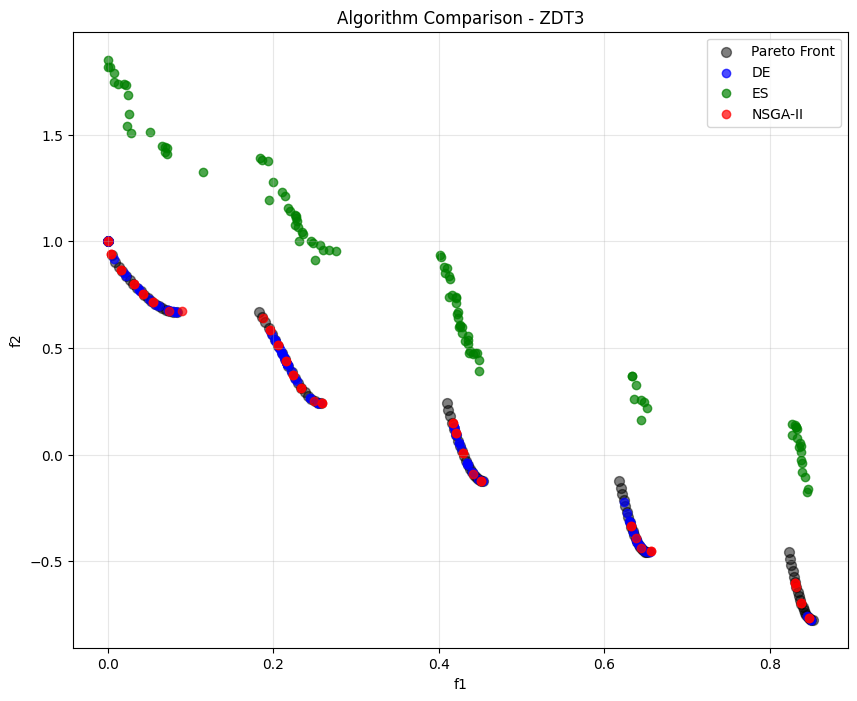

In [6]:
problem_name = 'zdt3'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=200, generations=1000, F=0.5)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=100, generations=1000, sigma_range_fac=0.02, center_bias=0.05)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=50, generations=200)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [ZDT4](https://pymoo.org/problems/multi/zdt.html#ZDT4)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 20                | 2         | 0                 |

Problém ZDT4 má konvexní množinu PO řešení a mnoho lokálních optim.
Mělo by se tedy ukázat, který algoritmus si s lokálními optimy poradí nejlépe.
Z výsledků vidíme, že nejlépe si s problémem poradil algoritmus NSGA2, který našel dostatek PO řešení.
K optimálním řešením se rozumně přiblížili i ES, naopak DE skončila v lokálních optimech.

---- Quality Metrics for zdt4 ----
DE       | #:  300 | GD: 38.4795 | IGD: 17.2300 | Spread: 5.2980
ES       | #:  100 | GD: 19.7848 | IGD: 17.3129 | Spread: 0.1782
NSGA-II  | #:  100 | GD: 0.0053 | IGD: 0.0066 | Spread: 0.0125


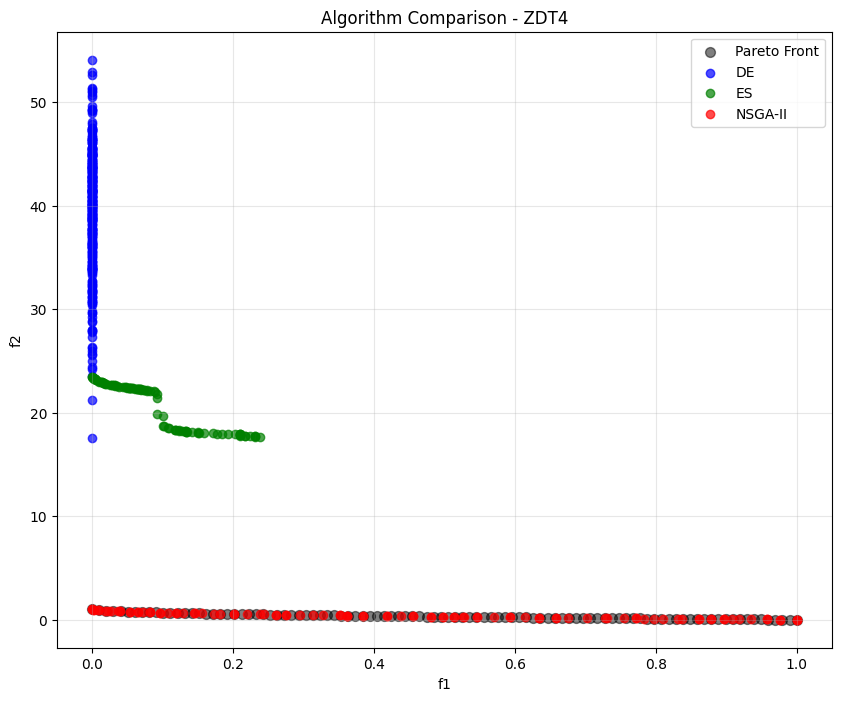

In [7]:
problem_name = 'zdt4'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=300, generations=2000)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=100, generations=1000, sigma_range_fac=0.01, center_bias=0.025)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=100, generations=500)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [DAS-CMOP 1](https://pymoo.org/problems/constrained/dascmop.html#DAS-CMOP1-(1))
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 30                | 2         | 11                |

V tomto problému všechny algoritmy zkonvergovali do nějakých lokálních optim.

---- Quality Metrics for dascmop1 ----
DE       | #:  200 | GD: 0.0002 | IGD: 0.1409 | Spread: 0.0648
ES       | #:  200 | GD: 0.0007 | IGD: 0.3730 | Spread: 0.0003
NSGA-II  | #:  100 | GD: 0.0008 | IGD: 0.3455 | Spread: 0.0011


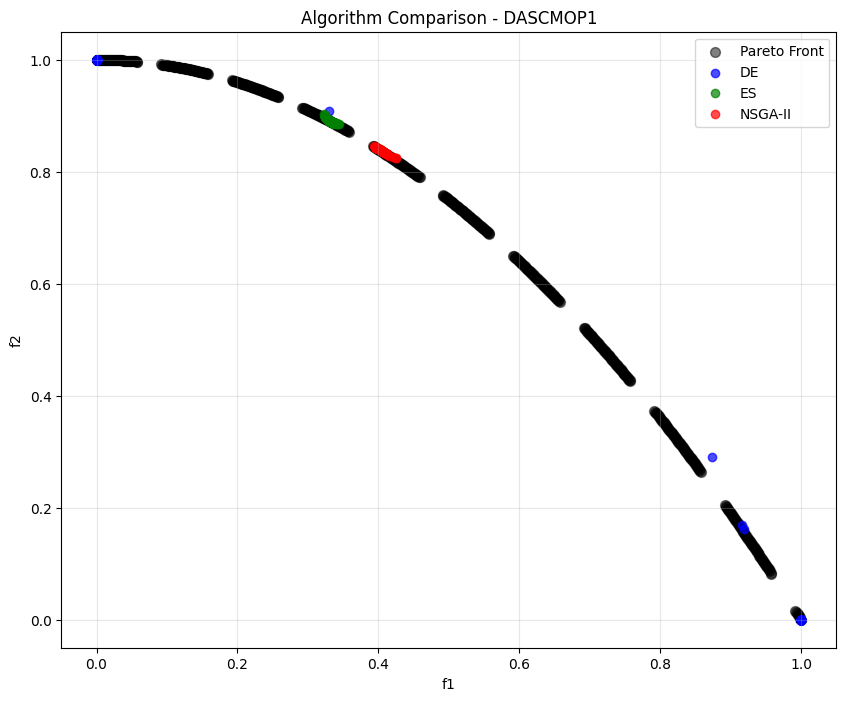

In [8]:
problem_name = 'dascmop1'
difficulty = 1
problem = get_problem(problem_name, difficulty)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=200, generations=1000, F=0.5)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=200, generations=1000, sigma_range_fac=0.02, center_bias=0.05)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=100, generations=500)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [TNK](https://pymoo.org/problems/multi/tnk.html)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 2                 | 2         | 2                 |

ÚF jsou v tomto problému přímo proměnné, tj. minimalizujeme pouze jejich hodnota, která je z intervalu (0, π). Množina PO je nespojitá a leží na nelineární ploše.


---- Quality Metrics for tnk ----
DE       | #:  200 | GD: 0.0050 | IGD: 0.0059 | Spread: 0.0265
ES       | #:  100 | GD: 0.0034 | IGD: 0.0049 | Spread: 0.0387
NSGA-II  | #:  100 | GD: 0.0034 | IGD: 0.0053 | Spread: 0.0392


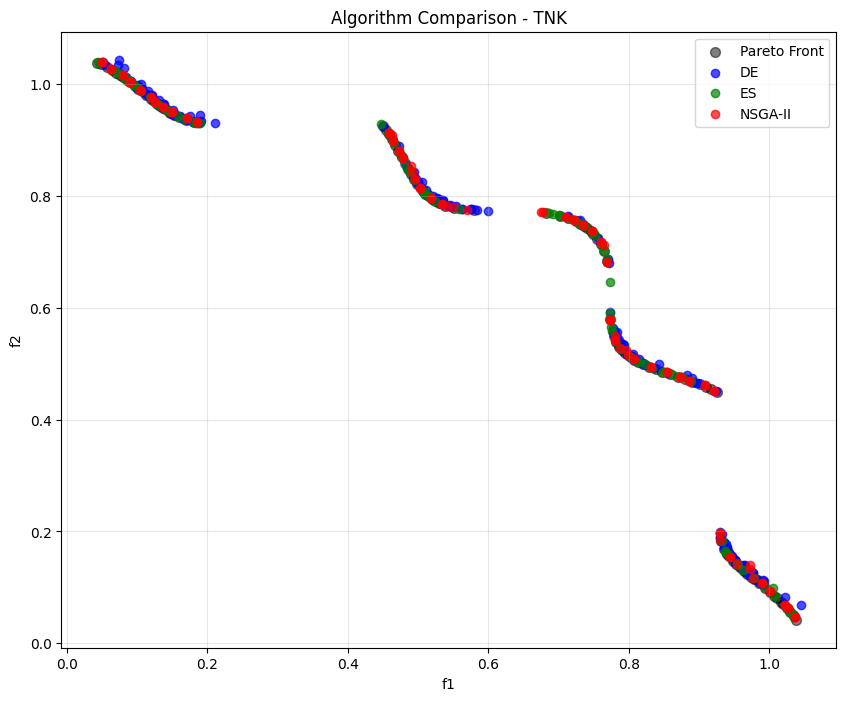

In [9]:
problem_name = 'tnk'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=200, generations=1000, F=0.7)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=100, generations=2000, sigma_range_fac=0.02, center_bias=0.05)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=100, generations=500)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Závěr

Z implementovaných algoritmů se nejvíce osvědčil NSGA2, který je speciálně určený právě pro hledání pareto-optimálních řešení. 
Dobré výslekdy poskytovala i diferenciální evoluce, ačkoliv u některých problému s mnoha podmínkami nebo lokálními optimy předčasně kovergovala. To by se dalo vyřešit větší populací a větším počtem generací.
Evoluční strategie u složitějcích problému obvykle poskytovali horší výsledky, možná kvůli nedostatku času nebo problémům se škálováním. Jejich další nevýhodou, který ale může souviset s mou implementací, je dlouhý čas běhu.

U všech experimentů by se samozřejmě slušelo spustit každý algoritmus s různými nastaveními parametrů několikrát, abychom získali relevantní statistiku, což jsem z časových důvodů vynechal.

**Poznámka k AI**:
Při programování tohoto projektu jsem využíval GitHub Copilot pro vytváření popisů funkcí a zefektivnění kódu, např. nahrazení cyklů numpy funkcemi.